# Test python-dtw package

The goal of this notebook is to test the `python-dtw` package to compute the correlation between stocks. To do this we use the two stocks obtained from `stocks_correlation.ipynb`, in this way we are sure that they have an high correlation, and as a prove we compute the correlation matrix between them with `python-dtw`.

In [49]:
import numpy as np
import pandas as pd

import warnings
from pandas_datareader import data as pdr

# to override deprecations in pandas-datareader
import yfinance as yf

# To set up the start/end dates for the prices
import datetime as dt

# to quickly get access to a list of the tickers in different indices
from yahoo_fin import stock_info as si

# Settings
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
yf.pdr_override()

In [50]:
# Set up the start/end dates for the prices
num_of_years = 1
start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
end = dt.date.today()

# Get the list of tickers in the Dow Jones
tickers = si.tickers_dow()

In [51]:
dataset = pdr.get_data_yahoo(tickers, start, end)['Adj Close']

dataset.head()

[*********************100%***********************]  30 of 30 completed


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-18,164.076080,244.157074,181.787338,179.850006,224.658096,187.009995,49.418877,168.119934,127.769997,62.682400,...,83.550293,277.794739,130.156845,153.121994,181.336807,527.010071,211.499557,50.219109,42.399979,153.432297
2022-04-19,166.392044,245.552643,184.438095,185.979996,226.846848,191.389999,50.115055,166.128311,131.899994,63.795612,...,83.278496,282.528320,135.516174,155.413101,172.466766,530.582153,214.009735,50.557724,43.448063,155.174500
2022-04-20,166.223068,247.500641,185.709274,183.550003,229.700012,186.229996,51.265686,166.805069,124.570000,64.261826,...,83.928879,283.577972,134.349380,159.546768,173.984268,538.782166,216.083344,51.178524,44.343704,157.123413
2022-04-21,165.417938,247.578140,183.028976,181.020004,227.247452,177.229996,51.033623,159.118866,121.660004,66.136223,...,83.705612,278.081909,133.943985,159.422272,172.564667,530.325562,214.753845,51.742889,44.600967,157.359650
2022-04-22,160.815811,242.625824,177.904846,176.919998,212.363358,171.429993,49.660606,155.609314,118.269997,65.175224,...,82.113625,271.367767,127.625504,158.088928,169.480698,514.044006,206.538742,48.827003,43.390900,154.396912


In [52]:
dataset.shape

(250, 30)

In [53]:
from dtw import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.style.use('seaborn')

# We use Apple and Microsoft because in `stocks_correlation.ipynb` they have the highest correlation
col1 = "AAPL"
col2 = "MSFT"
x = dataset[col1]
y = dataset[col2]

def compute_dtw(x, y, normalize=True):
    if normalize:
        scaler = StandardScaler()
        reshape = x.values.reshape(-1, 1)
        x = scaler.fit_transform(reshape)
        reshape = y.values.reshape(-1, 1)
        y = scaler.fit_transform(reshape)
        
    plt.rc("figure", figsize=(10,10))  # size of the figure
    dtw(x, y, keep_internals=True).plot(type="threeway", xlab=col1, ylab=col2)

    plt.rc("figure", figsize=(30,8))  # size of the figure
    dtw(x, y, keep_internals=True, 
        step_pattern=rabinerJuangStepPattern(ptype=4, slope_weighting="d"))\
        .plot(type="twoway", offset=-2).legend((col1, col2), loc="upper left")

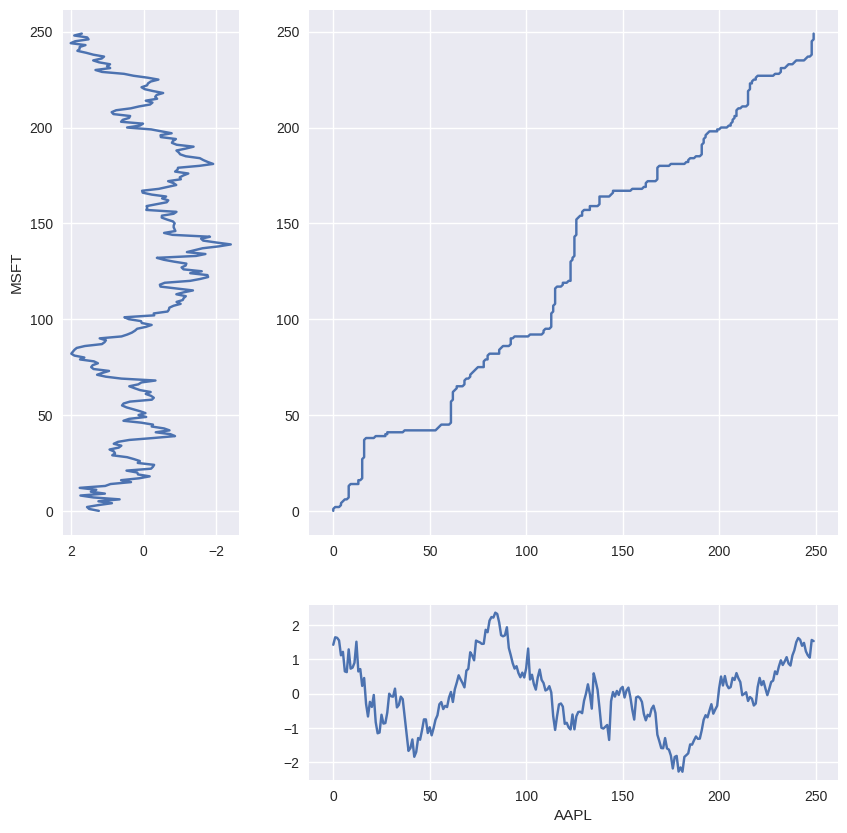

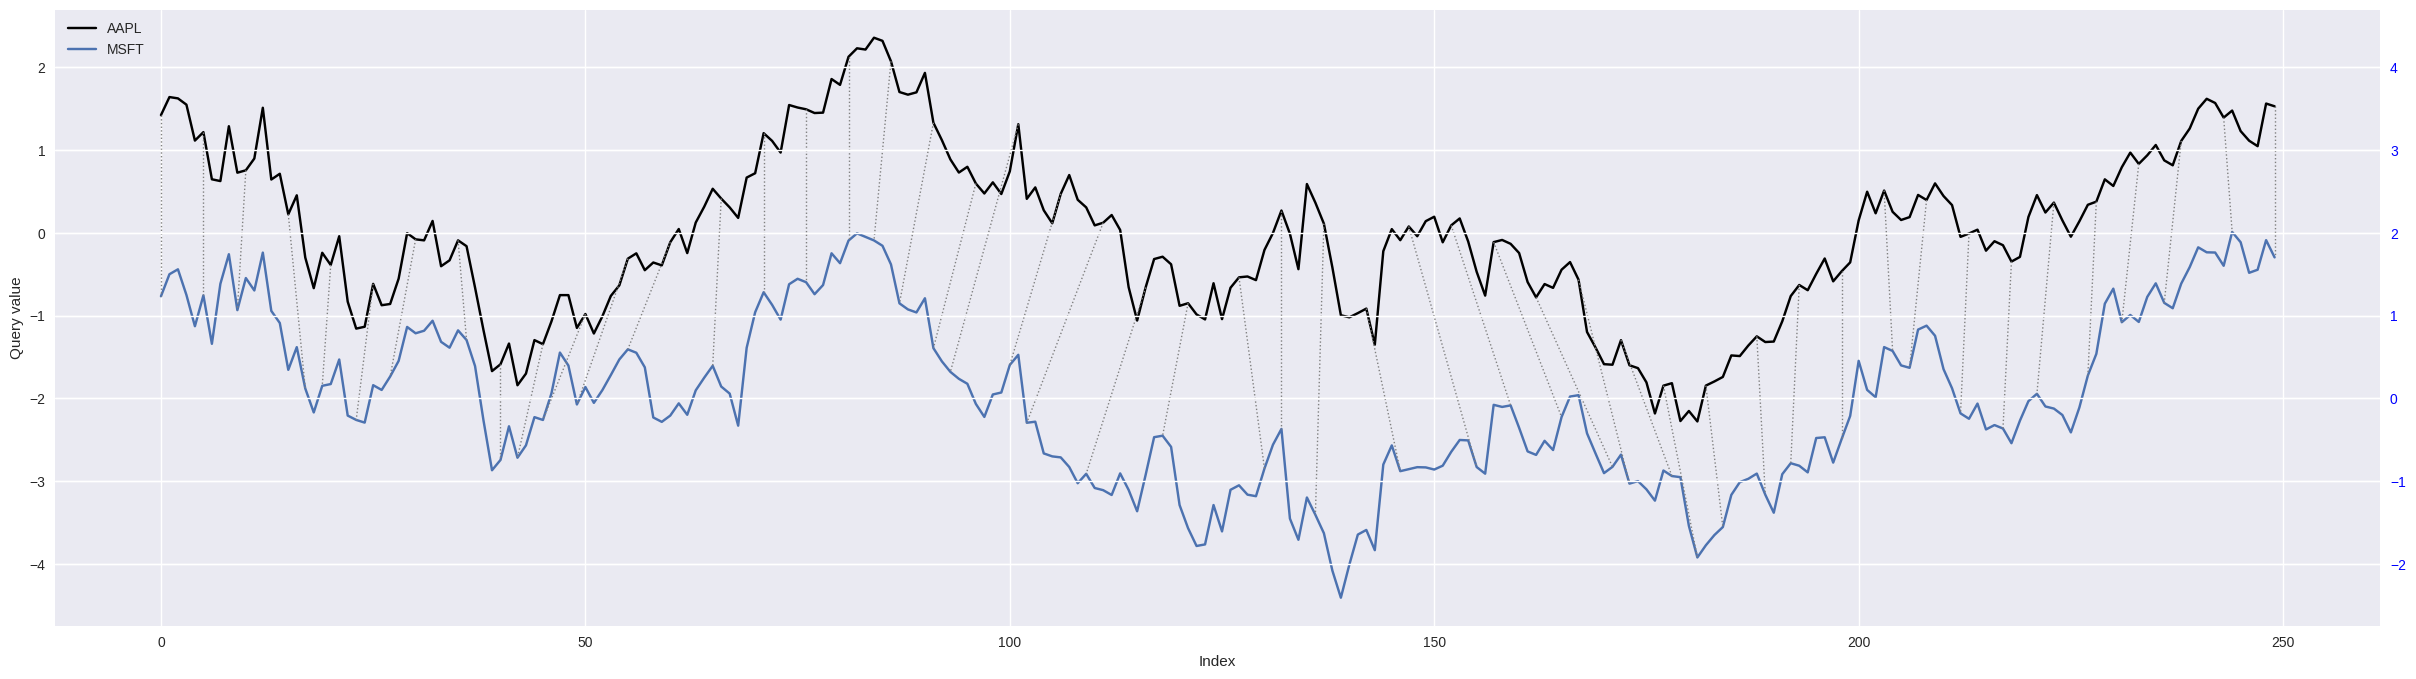

In [54]:
compute_dtw(x, y, normalize=True)

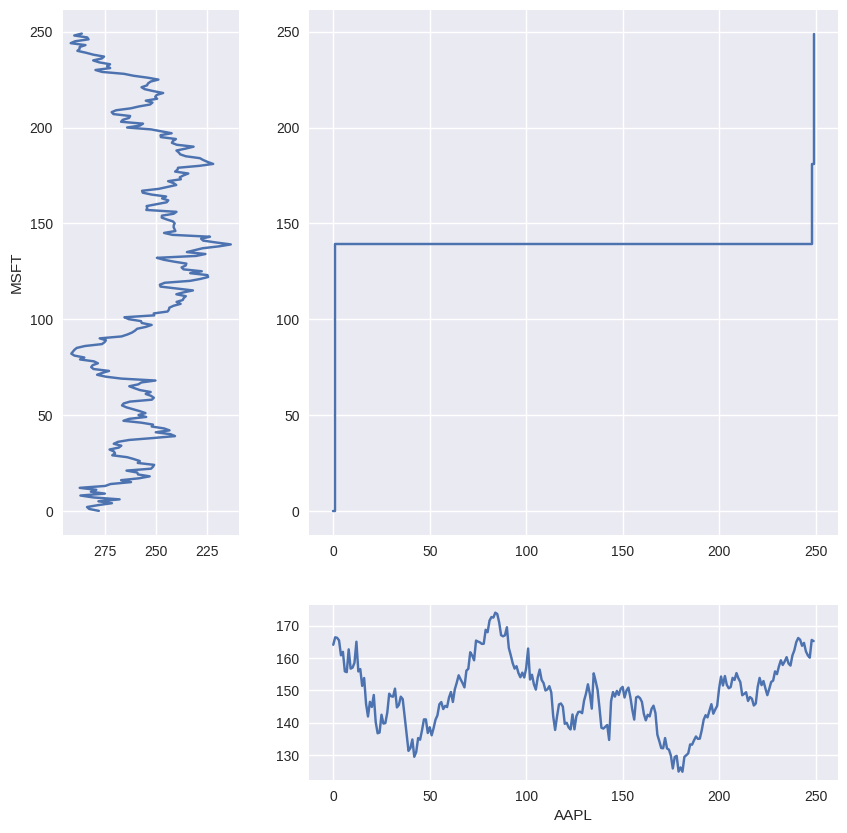

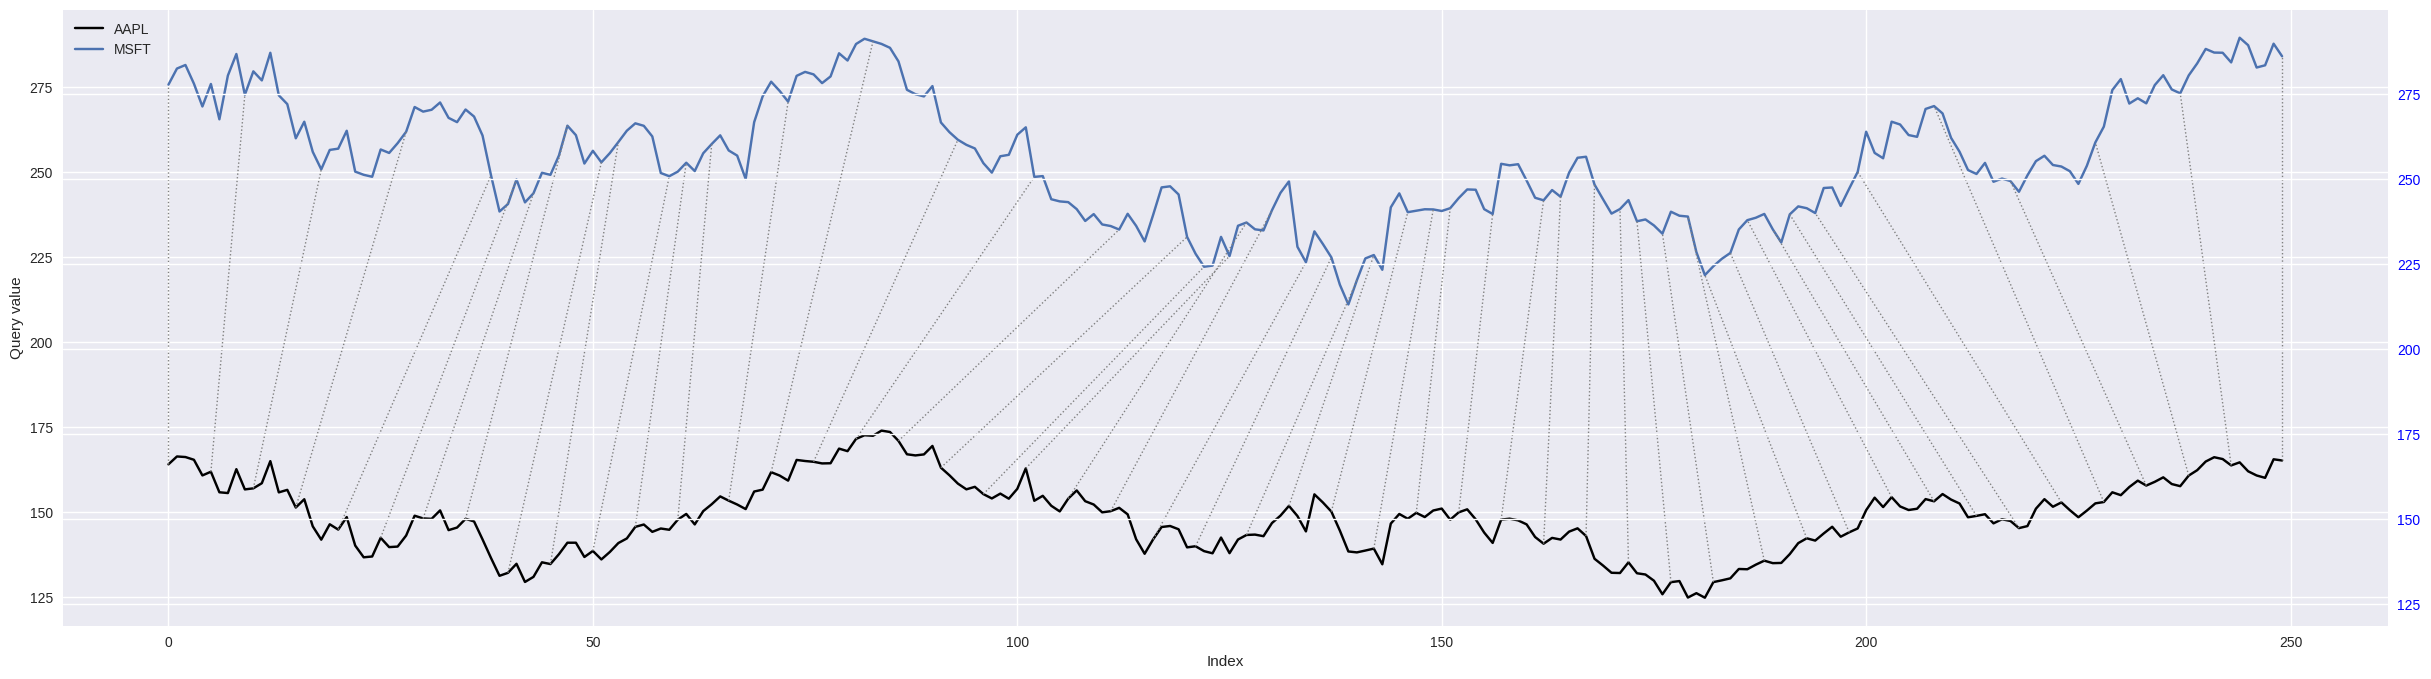

In [55]:
compute_dtw(x, y, normalize=False)

From the previous plots we can observe that without normalization no correlation is evident, this is due to the fact that the values of the shares have different scales even if they have the same trend.